In [1]:
## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2
import seaborn as sns  #0.11.1
import folium  #0.14.0
from folium import plugins
import plotly.express as px  #5.1.0

## for simple routing
import osmnx as ox  #1.2.2
import networkx as nx  #3.0

## for advanced routing 
from ortools.constraint_solver import pywrapcp  #9.6
from ortools.constraint_solver import routing_enums_pb2

In [2]:
city = "Hong Kong"

dtf = pd.read_csv('data/starbucks_stores.csv')
dtf = dtf[dtf["City"]==city][
        ["City","Street Address","Latitude","Longitude"]
      ].reset_index(drop=True)
dtf = dtf.reset_index().rename(
      columns={"index":"id", "Latitude":"y", "Longitude":"x"})

print("tot:", len(dtf))
dtf.head(3)

tot: 104


,id,City,Street Address,y,x
0,0,Hong Kong,"Shop No.101, 1st Floor, Liberte Place, 8, 33 Lai Chi Kok Road, Kowloon",22.33,114.15
1,1,Hong Kong,"Shop B, Ground Floor, 50 Connaught Central, Central, HK",22.29,114.16
2,2,Hong Kong,"Office Lobby, G/F Exchange Square, Central",22.28,114.16


In [3]:
# pinpoint your starting location
i = 0
dtf["base"] = dtf["id"].apply(lambda x: 1 if x==i else 0)
start = dtf[dtf["base"]==1][["y","x"]].values[0]

print("start =", start)
dtf.head(3)

start = [ 22.33 114.15]


,id,City,Street Address,y,x,base
0,0,Hong Kong,"Shop No.101, 1st Floor, Liberte Place, 8, 33 Lai Chi Kok Road, Kowloon",22.33,114.15,1
1,1,Hong Kong,"Shop B, Ground Floor, 50 Connaught Central, Central, HK",22.29,114.16,0
2,2,Hong Kong,"Office Lobby, G/F Exchange Square, Central",22.28,114.16,0


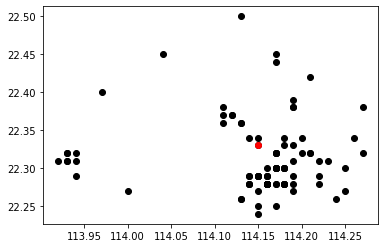

In [4]:
plt.scatter(y=dtf["y"], x=dtf["x"], color="black")
plt.scatter(y=start[0], x=start[1], color="red")
plt.show()

In [5]:
# setup
data = dtf.copy()
color = "base"  #color based on this column
lst_colors = ["black","red"]
popup = "id" #popup based on this column
  
# base map
map_ = folium.Map(location=start, tiles="cartodbpositron", zoom_start=11)

# add colors
lst_elements = sorted(list(data[color].unique()))
data["color"] = data[color].apply(lambda x: 
                  lst_colors[lst_elements.index(x)])

# add popup
data.apply(lambda row: 
    folium.CircleMarker(
            location=[row["y"],row["x"]], popup=row[popup],
            color=row["color"], fill=True, radius=5).add_to(map_), 
    axis=1)

# add full-screen button
plugins.Fullscreen(position="topright", title="Expand", 
      title_cancel="Exit", force_separate_button=True).add_to(map_)

# show
map_